In [ ]:
# default_exp models.km

# Kaplan Meier Model
> How to estimate the Kaplam Meier model.

In [ ]:
# export
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# hide
%load_ext autoreload
%autoreload 2
%matplotlib inline

The KM estimator is estimated by:
$$
S(t_i) = \prod_{t\le t_i} \left(1 - \frac{d_i}{n_i}\right)
$$
where $d_i$ is the number of deaths at time $t$ and $n_i$ is the number of individuals alive just before $t$. 

Given a large enough observation time, the last number of deaths will be equal to $n_i$. At this time point and into the future, the survival function is zero as $\left(1 - \frac{d_i}{n_i}\right)=0$.

In [ ]:
# export
class KaplanMeier:
    def fit(self, df):
        """
        Estimages the Kaplan-Meier survival function
        parameters:
        - t: time steps
        - e: whether death occured at time step (1) or not (0)
        """
        d = df.groupby("t")["e"].sum()
        n = df.groupby("t")["e"].count()
        n = n[::-1].cumsum()[::-1]
        self.survival_function = (1 - d / n).cumprod()
        
        if 0 not in self.survival_function:
            self.survival_function[0] = 1
            self.survival_function.sort_index(inplace=True)
        
    def plot_survival_function(self):
        fig, ax = plt.subplots()
        ax.plot(self.survival_function)
        ax.set_xlabel("Duration")
        ax.set_ylabel("Survival Probability")
        
        ax.set_title("Survival Function")
        return ax

In [ ]:
# hide
url = "https://raw.githubusercontent.com/CamDavidsonPilon/lifelines/master/lifelines/datasets/dd.csv"
df = pd.read_csv(url)

data:

In [ ]:
df.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


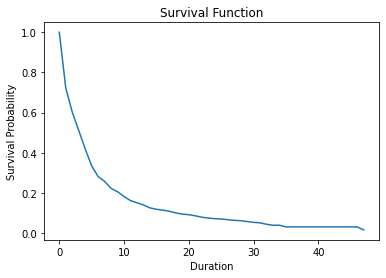

In [ ]:
km = KaplanMeier()
km.fit(df.rename(columns={'duration': 't', 'observed': 'e'}))
km.plot_survival_function();

In [ ]:
# hide
from lifelines import KaplanMeierFitter
import numpy as np

kmf = KaplanMeierFitter()

T = df["duration"]
E = df["observed"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1808 total observations, 340 right-censored observations>

In [ ]:
# hide
np.allclose(kmf.survival_function_.values.ravel(), km.survival_function)

True

In [ ]:
# hide
from nbdev.export import *
notebook2script("KaplanMeier.ipynb")

Converted KaplanMeier.ipynb.
